In [1]:
import glob
import numpy as np
import pandas as pd
from datetime import datetime, date

import matplotlib.pyplot as plt
import plotly.express as px

from talib import RSI, BBANDS

import talib


In [2]:
data_path =  os.path.join(os.getcwd(),"nse_data\\data\\")
data_index = os.path.join(os.getcwd(),"nse_data\\index_data\\")
dump_path =  os.path.join(os.getcwd(),"nse_data\\dump\\")
meta_data =  os.path.join(os.getcwd(),"nse_data\\meta_data\\")
reports_path = os.path.join(os.getcwd(),"nse_data\\reports\\")
nse_indices = os.path.join(os.getcwd(),"nse_data\\nse_indices\\")
# print(nse_indices)

In [3]:
nifty500_df = pd.read_csv(os.path.join(nse_indices, "ind_nifty500list.csv"))
stocks_list = nifty500_df.Symbol.tolist()
len(stocks_list)

501

In [4]:
stocks_list = list(dict.fromkeys(stocks_list))

add_stocks = ['VEDL', 'YESBANK', 'SBICARD']
skip_stocks = ['BBTC','IRB','M&MFIN','PVR']

stocks_list = stocks_list + add_stocks
stocks_list = sorted(set(stocks_list)-(set(skip_stocks)))
len(stocks_list)

# stocks_list = random.sample(stocks_list, len(stocks_list))

499

In [5]:
start_date = '2020-08-07'
end_date = date.today()

In [6]:
# Function to get script data file path if present
def get_stock_file_path(script):
    for file in glob.glob(data_path + script + '_*.csv'):
        file = file.replace("\\","/")
        return(file)
    
def get_stock_filename(path):
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)
    
# Function to check if the script data file already present or not: True or False
def stock_data_present(script):
    file = get_stock_file_path(script)
    if file:
        return True
    return False

# Function to get stock dataframe from script name
def stock_df_from_csv(script):
    file = get_stock_file_path(script)
    stock_df = pd.read_csv(file)
    return stock_df

# Function to get stock dataframe from script name with Date as Index
def get_df_date_index(stock):
    df = stock_df_from_csv(stock)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', drop=True, inplace = True)
    df.index.name = None
    return df

def calculate_ema(df , t = 30 , field = 'Close'):
    ema = talib.EMA(df[field], timeperiod = t)
    ema.name = 'ema'+ str(t)
    ema = ema.to_frame()
    df = df.merge(ema, left_index=True, right_index=True)
    return df

In [7]:
# Function to create Golden Cross Report

def ema_cross_report(stocks):
    ema_cross_df = []
    for stock in stocks:
        df = get_df_date_index(stock)
        df = calculate_ema(df, 9)
        df = calculate_ema(df, 26)
        df = df[start_date:end_date]
        df = df[["Close","ema9","ema26"]]
        df = np.round(df, decimals=4)
        df.index.name ="Date"
        df = df.reset_index()
#         display(df)
        for ind in df.index: 
#             print(ind-1)
            if ind+1 < df.shape[0]:
                if (df['ema9'][ind] < df['ema26'][ind] ) & (df['ema9'][ind+1] > df['ema26'][ind+1]):
#                     print(stock ,df['Date'][ind] , df['sma50'][ind] , df['sma200'][ind] , df['sma50'][ind+1] , df['sma200'][ind+1] , sep = "\t\t")
                    ema_cross_df.append(
                                {   'Stock': stock,
                                    'Date': df['Date'][ind],
                                    'EMA9':df['ema9'][ind],
                                    'EMA26':df['ema26'][ind]
                                })
                    ema_cross_df.append(
                                {   'Stock': stock,
                                    'Date': df['Date'][ind+1],
                                    'EMA9':df['ema9'][ind+1],
                                    'EMA26':df['ema26'][ind+1]
                                }
                        
                            )
    return pd.DataFrame(ema_cross_df)

        


In [8]:
# Exponential Crossover Report
ema_cross_report_df = ema_cross_report(stocks_list)
update_date = pd.to_datetime(end_date)
datetime_obj = update_date.to_pydatetime().date() 
ema_crossover_file = reports_path + 'EMA_Crossover_Report_' + datetime_obj.strftime('%d-%m-%Y') + '.csv'
ema_cross_report_df.to_csv(ema_crossover_file, index = True)
print(ema_crossover_file, ' Saved to Disk')

C:\Users\Anirudh\Desktop\Technical_Analysis\nse_data\reports\EMA_Crossover_Report_24-05-2021.csv  Saved to Disk


(4580, 14)
(4622, 16)
(591, 16)
(591, 3)


,Close,ema9,ema26
2019-01-01,281.50,272.648236,264.020580
2019-01-02,275.40,273.198589,264.863500
2019-01-03,276.30,273.818871,265.710648
2019-01-04,282.95,275.645097,266.987637
2019-01-07,278.25,276.166077,267.821886
...,...,...,...
2021-05-17,153.50,147.557515,144.569866
2021-05-18,146.65,147.376012,144.723950
2021-05-19,146.40,147.180810,144.848102
2021-05-20,147.40,147.224648,145.037132


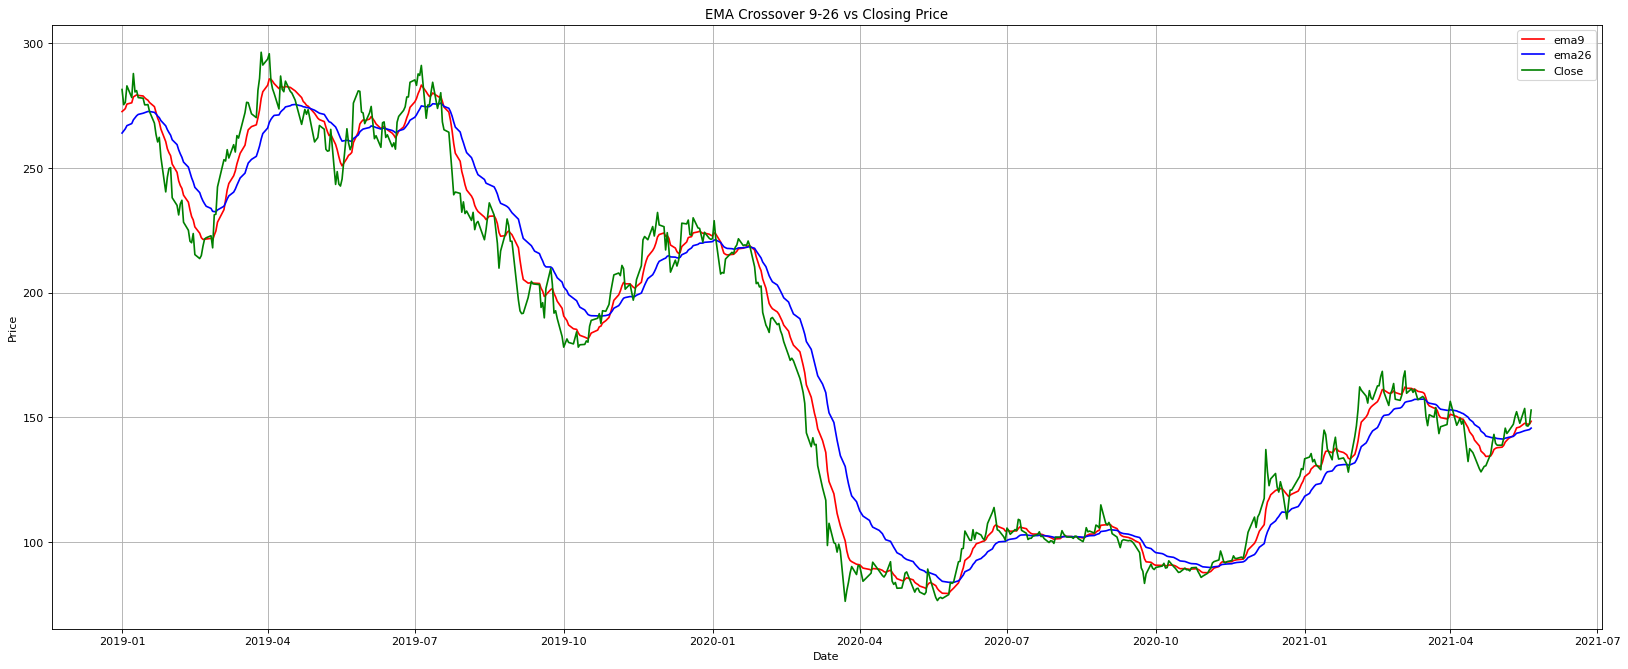

In [9]:
start_date = '2019-01-01'
end_date = date.today()

df = get_df_date_index('CANBK')   
print(df.shape)

df = calculate_ema(df, 9)
df = calculate_ema(df, 26)
print(df.shape)
# df.to_csv("TCS_ema_9_26.csv", index = True)

df = df[start_date:end_date]
print(df.shape)


df = df[["Close","ema9","ema26"]]
print(df.shape)
display(df)
# display(df.tail(5))



# *********************************************************************************************
# Create Matplotlib Line plot for SMA -50 -200

plt.figure(num=None, figsize=(25,10), dpi=80, facecolor='w', edgecolor='k')

# plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EMA Crossover 9-26 vs Closing Price')
plt.plot( df.ema9 ,label='ema9', color="red")
plt.plot( df.ema26 ,label='ema26', color="blue")
plt.plot(df.Close, label='Close',color="green")
plt.grid()
plt.legend()

plt.show()